In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
df = pd.read_csv("Supermarket Sales Cleaned (2).csv")
print("Dataset Info:")
print(df.info())
print("\nSample Data:")
print(df.head())
print("\nSummary Statistics:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margi

In [6]:
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    # Add Month and Day columns
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day_name()

# Inspect missing values
print("\nMissing values per column:")
print(df.isnull().sum())



Missing values per column:
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Day                        0
Month                      0
Year                       0
dtype: int64


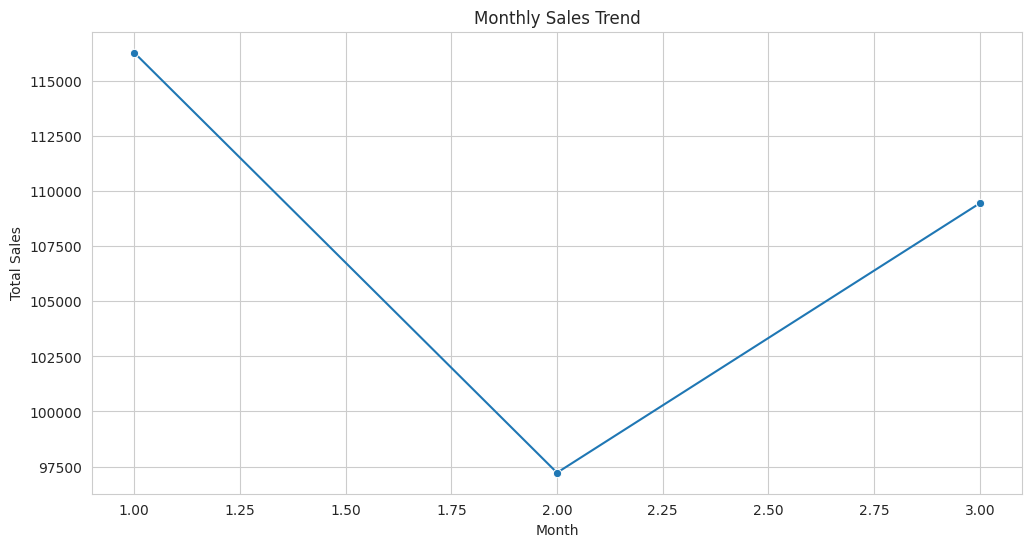

/tmp/ipython-input-3160455188.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis')


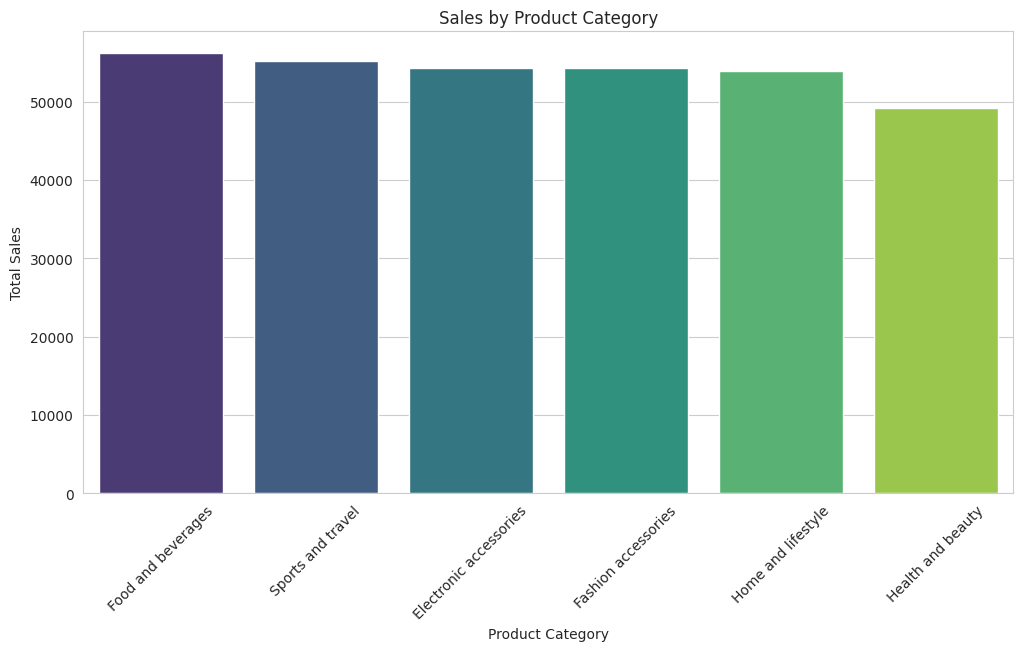

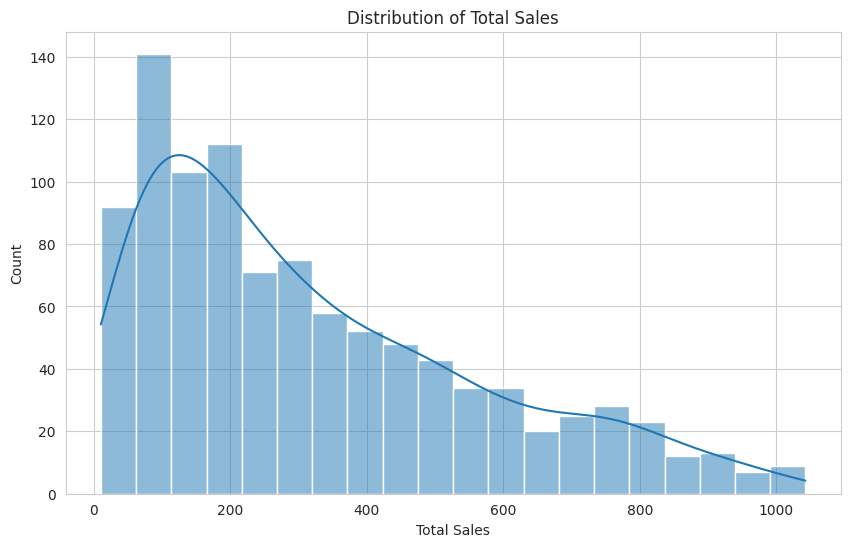

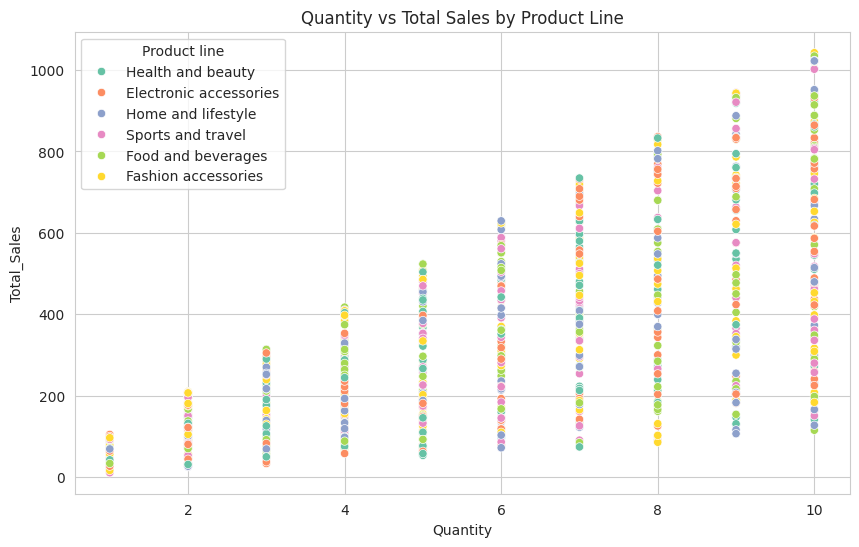

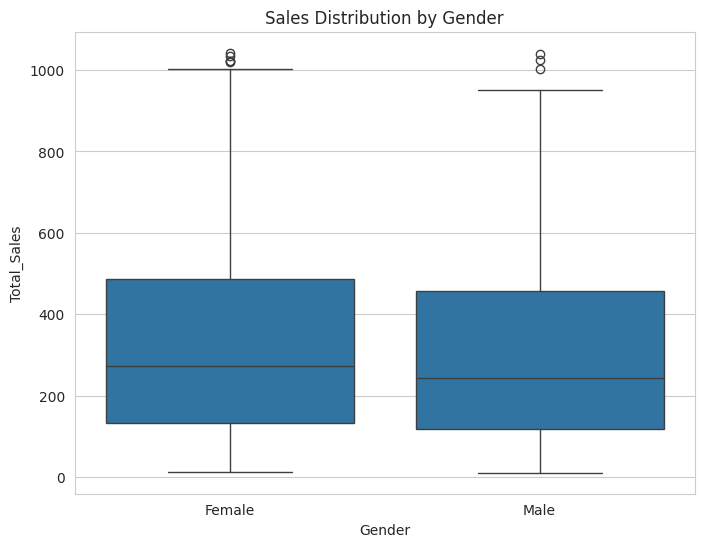

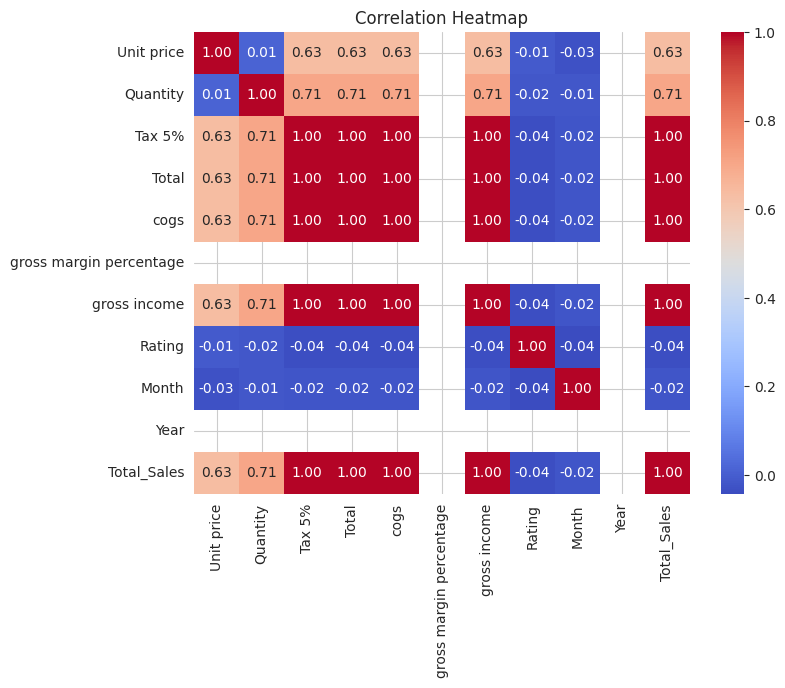

In [7]:
if 'Quantity' in df.columns and 'Price' in df.columns:
    df['Total_Sales'] = df['Quantity'] * df['Price']
elif 'Total' in df.columns:
    df['Total_Sales'] = df['Total']
else:
    print("No direct Total_Sales column found or calculable.")

# ---- Visualization Section ----

# Sales trends over months
if 'Month' in df.columns:
    plt.figure(figsize=(12,6))
    monthly_sales = df.groupby('Month')['Total_Sales'].sum()
    sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
    plt.title('Monthly Sales Trend')
    plt.xlabel('Month')
    plt.ylabel('Total Sales')
    plt.show()

# Sales by Product Category
if 'Product line' in df.columns:
    plt.figure(figsize=(12,6))
    category_sales = df.groupby('Product line')['Total_Sales'].sum().sort_values(ascending=False)
    sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis')
    plt.title('Sales by Product Category')
    plt.xticks(rotation=45)
    plt.ylabel('Total Sales')
    plt.xlabel('Product Category')
    plt.show()

# Distribution of Total Sales
if 'Total_Sales' in df.columns:
    plt.figure(figsize=(10,6))
    sns.histplot(df['Total_Sales'], bins=20, kde=True)
    plt.title('Distribution of Total Sales')
    plt.xlabel('Total Sales')
    plt.show()

# Relationship between Quantity and Total Sales
if 'Quantity' in df.columns and 'Total_Sales' in df.columns:
    plt.figure(figsize=(10,6))
    sns.scatterplot(x='Quantity', y='Total_Sales', data=df, hue='Product line', palette='Set2')
    plt.title('Quantity vs Total Sales by Product Line')
    plt.show()

# Sales by Gender
if 'Gender' in df.columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(x='Gender', y='Total_Sales', data=df)
    plt.title('Sales Distribution by Gender')
    plt.show()

# Correlation Heatmap
plt.figure(figsize=(8,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



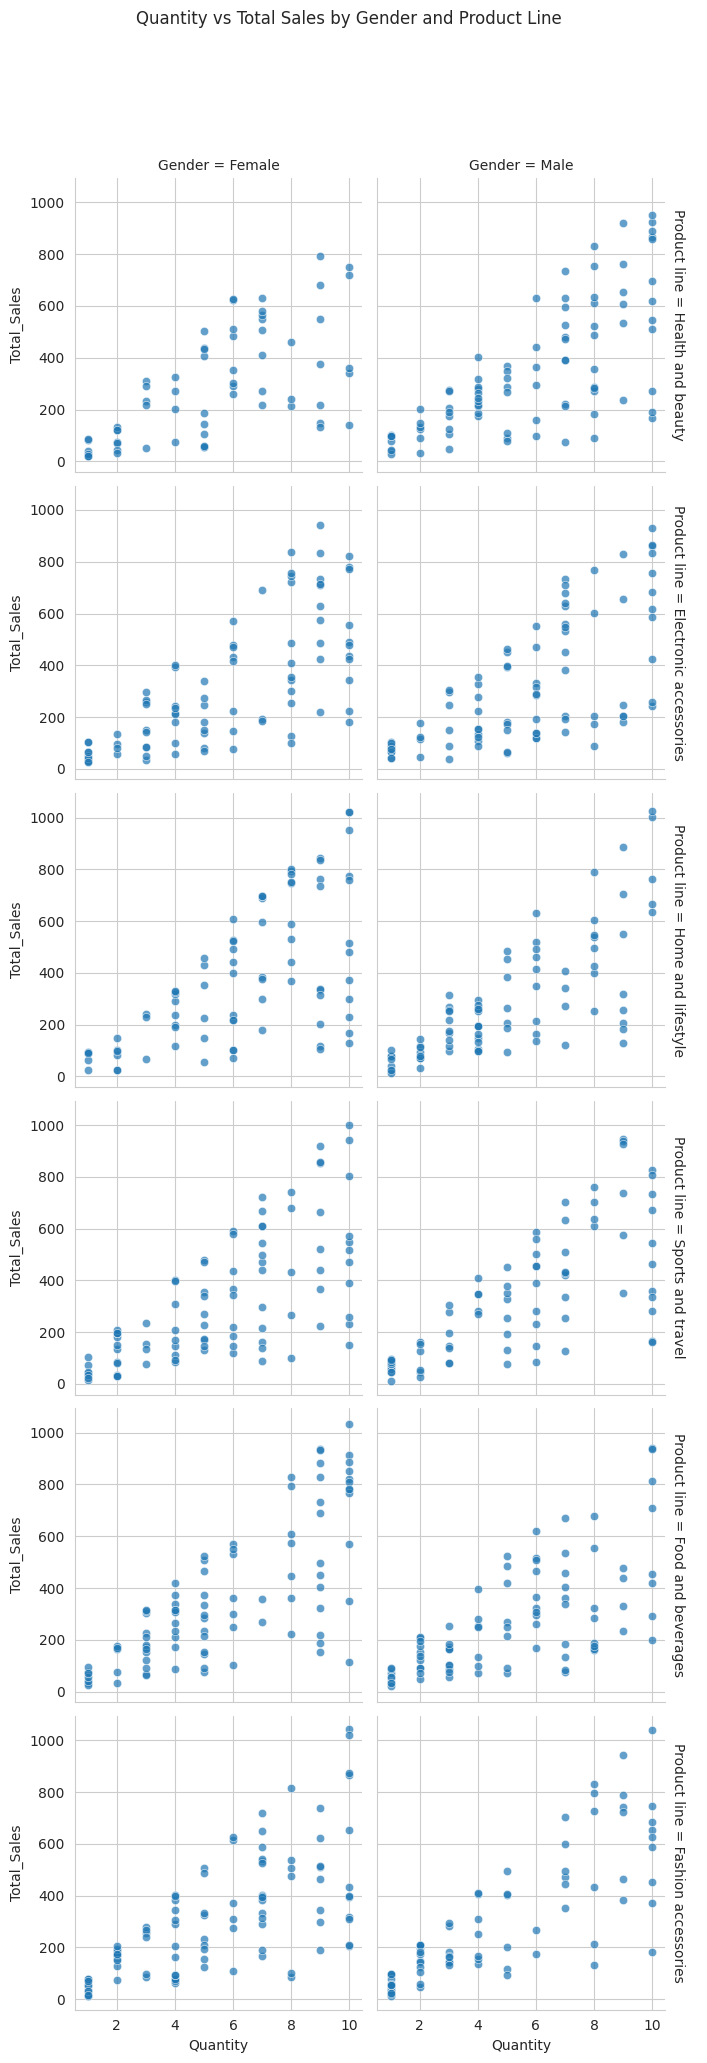

In [8]:
if 'Gender' in df.columns and 'Product line' in df.columns:
    g = sns.FacetGrid(df, col='Gender', row='Product line', height=3.5, margin_titles=True)
    g.map(sns.scatterplot, 'Quantity', 'Total_Sales', alpha=0.7)
    g.add_legend()
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle('Quantity vs Total Sales by Gender and Product Line')
    plt.show()

In [9]:
print("EDA and visualization completed. Insights can be drawn from the above graphs.")


EDA and visualization completed. Insights can be drawn from the above graphs.
